In [12]:
import torch, detectron2

In [13]:
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

/bin/bash: line 1: nvcc: command not found
torch:  2.2 ; cuda:  cu121
detectron2: 0.6


In [14]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random


# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [15]:
from PIL import Image
from IPython.display import display, clear_output

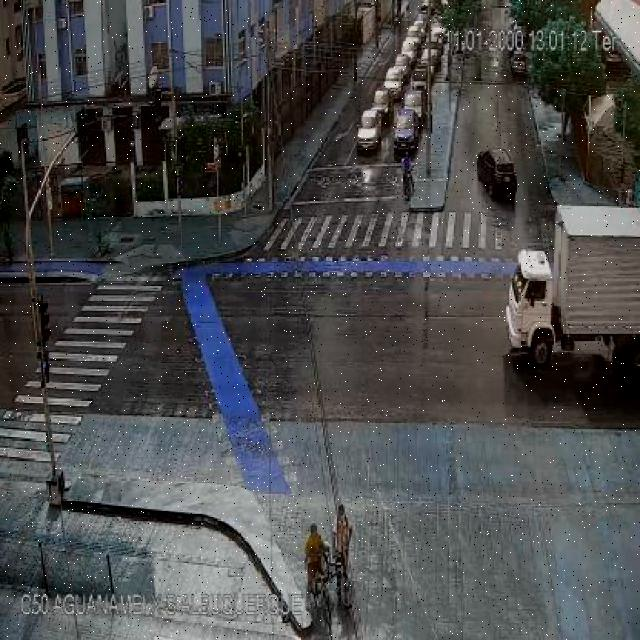

In [16]:
from matplotlib import pyplot as plt
import cv2

img = cv2.imread("train/images/aguanambi-1000_png_jpg.rf.0ab6f274892b9b370e6441886b2d7b9d.jpg")
display(Image.fromarray(img))

In [18]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

RuntimeError: COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml not available in Model Zoo!

In [ ]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([7, 0, 2, 2, 2, 0, 2, 2], device='cuda:0')
Boxes(tensor([[503.2984, 201.4999, 638.9646, 388.0169],
        [303.0371, 523.3091, 327.4455, 595.9238],
        [392.7861, 112.6843, 417.5771, 152.9777],
        [476.0027, 148.9625, 519.1558, 205.8497],
        [355.6358, 111.8501, 380.9934, 155.0550],
        [401.6620, 149.1869, 415.2746, 201.6901],
        [510.1606,  50.4659, 528.0335,  78.0684],
        [410.9775,  66.5499, 430.2921,  91.5725]], device='cuda:0'))


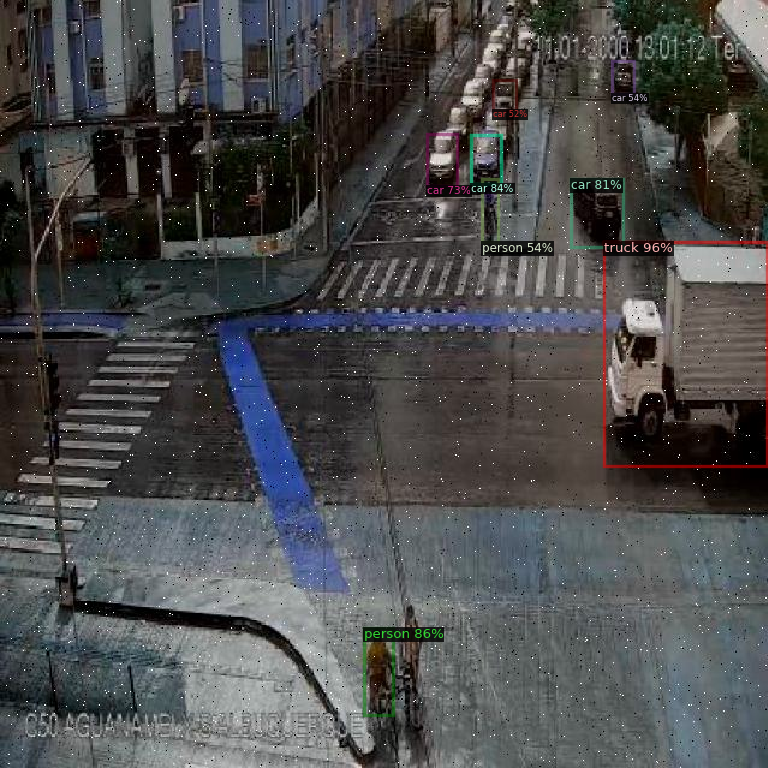

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
img = out.get_image()[:, :, ::-1]
#cv2_imshow(out.get_image()[:, :, ::-1])
display(Image.fromarray(img))

In [ ]:
MetadataCatalog.get("your_dataset").set(thing_classes=["class0", "class1", "class2", "class3"])


namespace(name='your_dataset',
          thing_classes=['class0', 'class1', 'class2', 'class3'])